In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import json

# matplotlib 한글폰트 지정
plt.rc('font',family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [2]:
import folium

districts = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구",
             "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구",
             "관악구", "서초구", "강남구", "송파구", "강동구"]

gym_counts = [58, 70, 67, 98, 107, 106, 80, 94, 51, 58, 111, 104, 74, 170, 126, 229, 109, 69, 138, 93, 148, 269, 444, 260, 115]

data = dict(zip(districts, gym_counts))

df = pd.DataFrame(list(data.items()), columns=['자치구', '체력 단련장 수'])

geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(
    location=[37.566345, 126.977893], zoom_start=10.5
)

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=data,
    columns=['자치구', '체력 단련장 수'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

# 네모 박스로 제목 추가 (스타일 및 좌측 상단 정렬 변경)
title_html = '''
             <div style="position: fixed;
                         top: 10px; left: 10px; width: 200px; height: 40px;
                         border:2px solid #555; z-index:9999; font-size:16px;
                         background-color:white; text-align:center;
                         color: black; line-height:40px;"><b>서울시 체력단련장 분포</b></div>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# 이미지로 저장
#m.save("서울시체력단련장분포.html")  # HTML 파일로 저장

m

In [3]:
import folium

districts = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구",
             "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구",
             "관악구", "서초구", "강남구", "송파구", "강동구"]

people_counts = [141316, 118450, 212043, 282193, 334190, 331973, 337150, 425639, 293755, 311839,
              504411, 456474, 304192, 354420, 431427, 555402, 392040, 224123, 360059, 377366, 479969,
              394955, 499028, 631722, 436710]

data_seoul_p = dict(zip(districts, people_counts))

df1 = pd.DataFrame(list(data.items()), columns=['구', '상주인구'])

geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m2 = folium.Map(
    location=[37.566345, 126.977893], zoom_start=10.5
)

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=data_seoul_p,
    columns=['구', '상주인구'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m2)


# 네모 박스로 제목 추가 (스타일 및 좌측 상단 정렬 변경)
title_html = '''
             <div style="position: fixed;
                         top: 10px; left: 10px; width: 200px; height: 40px;
                         border:2px solid #555; z-index:9999; font-size:16px;
                         background-color:white; text-align:center;
                        color: black; line-height:40px;"><b>서울시 상주(야간)인구</b></div>
             '''
m2.get_root().html.add_child(folium.Element(title_html))

# 이미지로 저장
# m2.save("서울시상주인구.html")  # HTML 파일로 저장

m2


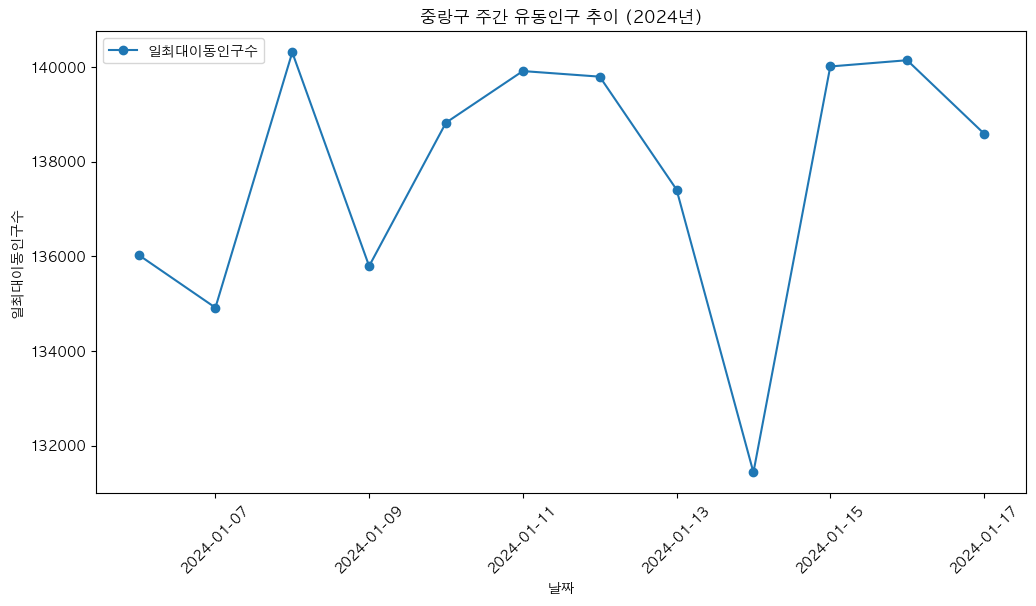

In [4]:
# CSV 파일에서 데이터 읽어오기
df_seoul_jr = pd.read_csv('서울시 자치구단위 생활인구 유동인구 중랑구_2024.csv')

# '기준일ID'를 날짜 형식으로 변환
df_seoul_jr['기준일ID'] = pd.to_datetime(df_seoul_jr['기준일ID'], format='%Y%m%d')

# 일별 총생활인구수 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(df_seoul_jr['기준일ID'], df_seoul_jr['일최대이동인구수'], marker='o', label='일최대이동인구수')
plt.title('중랑구 주간 유동인구 추이 (2024년)')
plt.xlabel('날짜')
plt.ylabel('일최대이동인구수')
plt.xticks(rotation=45)
plt.legend()
plt.show()


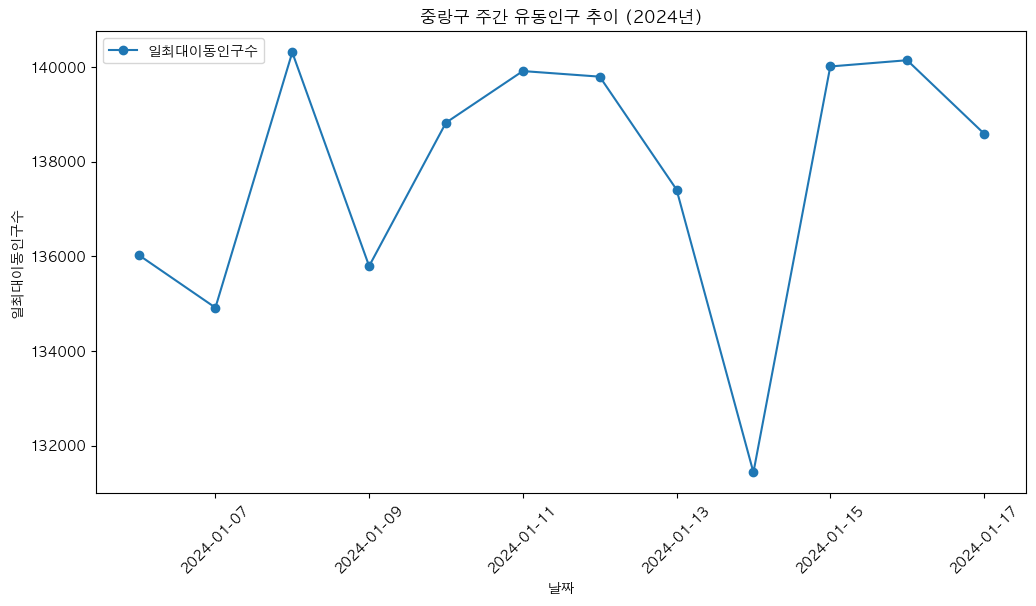

In [5]:
# CSV 파일에서 데이터 읽어오기
df_seoul_jr = pd.read_csv('서울시 자치구단위 생활인구 유동인구 중랑구_2024.csv')

# '기준일ID'를 날짜 형식으로 변환
df_seoul_jr['기준일ID'] = pd.to_datetime(df_seoul_jr['기준일ID'], format='%Y%m%d')

# 일별 총생활인구수 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(df_seoul_jr['기준일ID'], df_seoul_jr['일최대이동인구수'], marker='o', label='일최대이동인구수')
plt.title('중랑구 주간 유동인구 추이 (2024년)')
plt.xlabel('날짜')
plt.ylabel('일최대이동인구수')
plt.xticks(rotation=45)
plt.legend()

# 이미지로 저장
plt.savefig('/Users/icda/pythondata/images/weekly_population_movement.png')

# 그래프 표시
plt.show()


In [6]:
df_junrangu_dong= pd.read_csv('서울시 동별 인구수와 인구밀도_중랑구.csv')

df_junrangu_dong

,자치구,동,인구 (명),면적 (㎢),인구밀도 (명/㎢)
0,중랑구,면목2동,"24,206",0.77,"31,436"
1,중랑구,면목4동,"18,746",0.87,"21,547"
2,중랑구,면목5동,"14,836",0.70,"21,194"
3,중랑구,면목7동,"21,798",1.20,"18,165"
4,중랑구,상봉1동,"23,714",0.88,"26,948"
5,중랑구,상봉2동,"20,612",0.65,"31,711"
6,중랑구,중화1동,"19,293",0.64,"30,145"
7,중랑구,중화2동,"24,926",1.01,"24,679"
8,중랑구,묵1동,"34,344",1.20,"28,620"
9,중랑구,묵2동,"18,624",0.67,"27,797"


In [7]:


# '인구' 및 '인구밀도' 열을 정수로 변환
df_junrangu_dong['인구 (명)'] = pd.to_numeric(df_junrangu_dong['인구 (명)'].str.replace(',', ''), errors='coerce').astype(int)
df_junrangu_dong['인구밀도 (명/㎢)'] = pd.to_numeric(df_junrangu_dong['인구밀도 (명/㎢)'].str.replace(',', ''), errors='coerce').astype(int)

# 변환된 데이터 확인
print(df_junrangu_dong.dtypes)


자치구            object
동              object
인구 (명)          int64
면적 (㎢)        float64
인구밀도 (명/㎢)      int64
dtype: object


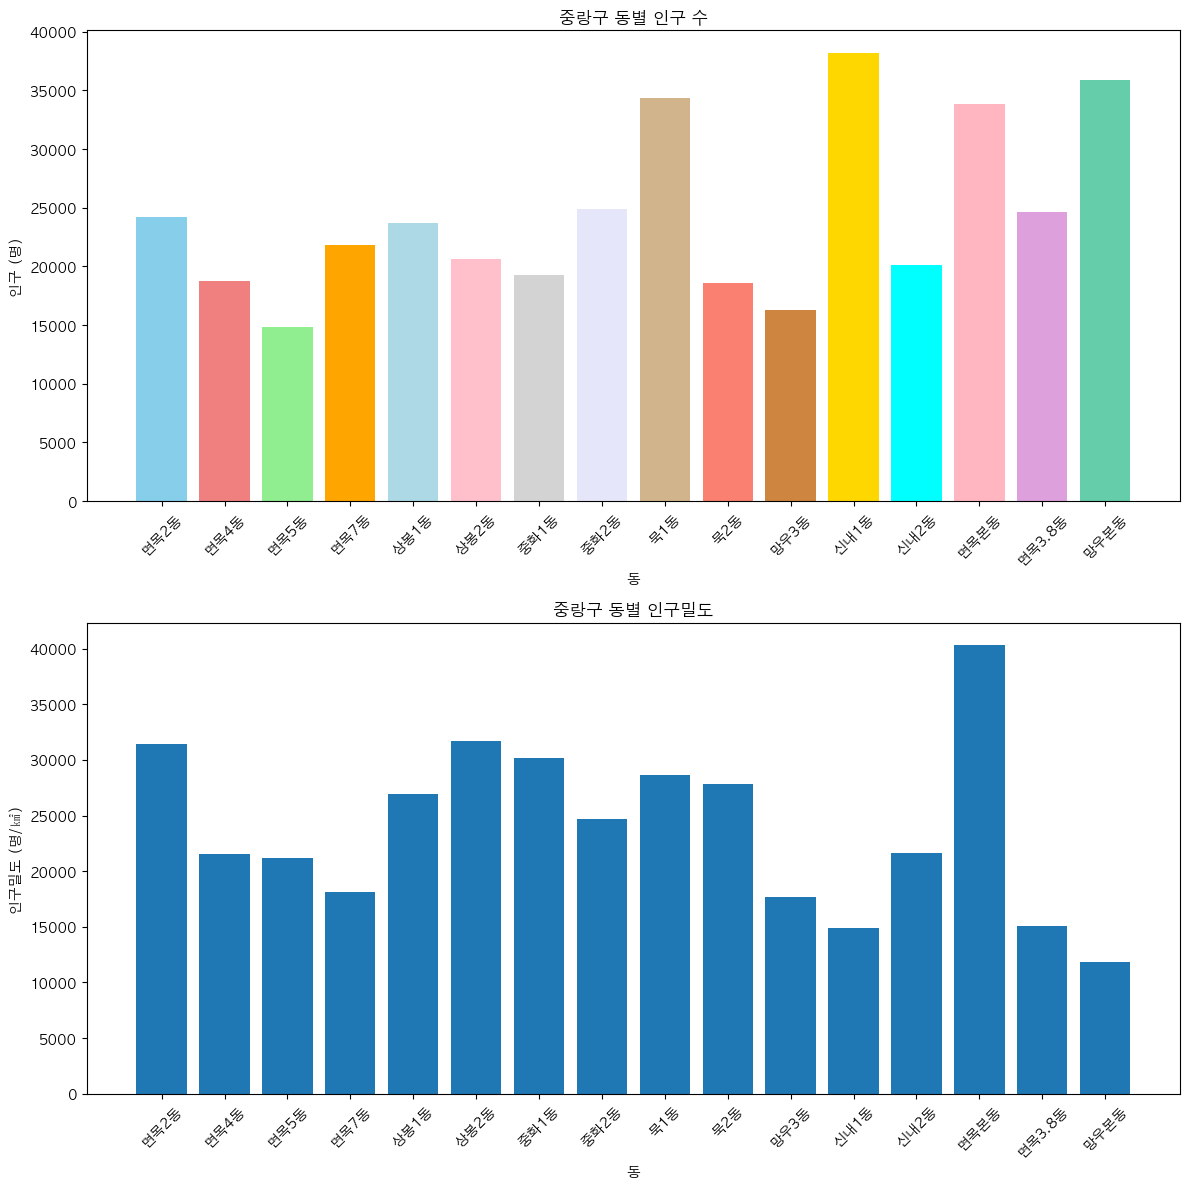

In [8]:

# 사용할 색상 리스트
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightblue', 'pink', 'lightgray', 'lavender', 'tan', 'salmon', 'peru', 'gold', 'cyan', 'lightpink', 'plum', 'mediumaquamarine']

# 동별 인구 및 인구밀도 차트 생성 (한 프레임에 표시)
plt.figure(figsize=(12, 12))

# 서브플롯 1 - 동별 인구
plt.subplot(2, 1, 1)
plt.bar(df_junrangu_dong['동'], df_junrangu_dong['인구 (명)'], color=colors)
plt.title('중랑구 동별 인구 수')
plt.xlabel('동')
plt.ylabel('인구 (명)')
plt.xticks(rotation=45)

# 서브플롯 2 - 동별 인구밀도
plt.subplot(2, 1, 2)
plt.bar(df_junrangu_dong['동'], df_junrangu_dong['인구밀도 (명/㎢)'])
plt.title('중랑구 동별 인구밀도')
plt.xlabel('동')
plt.ylabel('인구밀도 (명/㎢)')
plt.xticks(rotation=45)

# 그림 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()


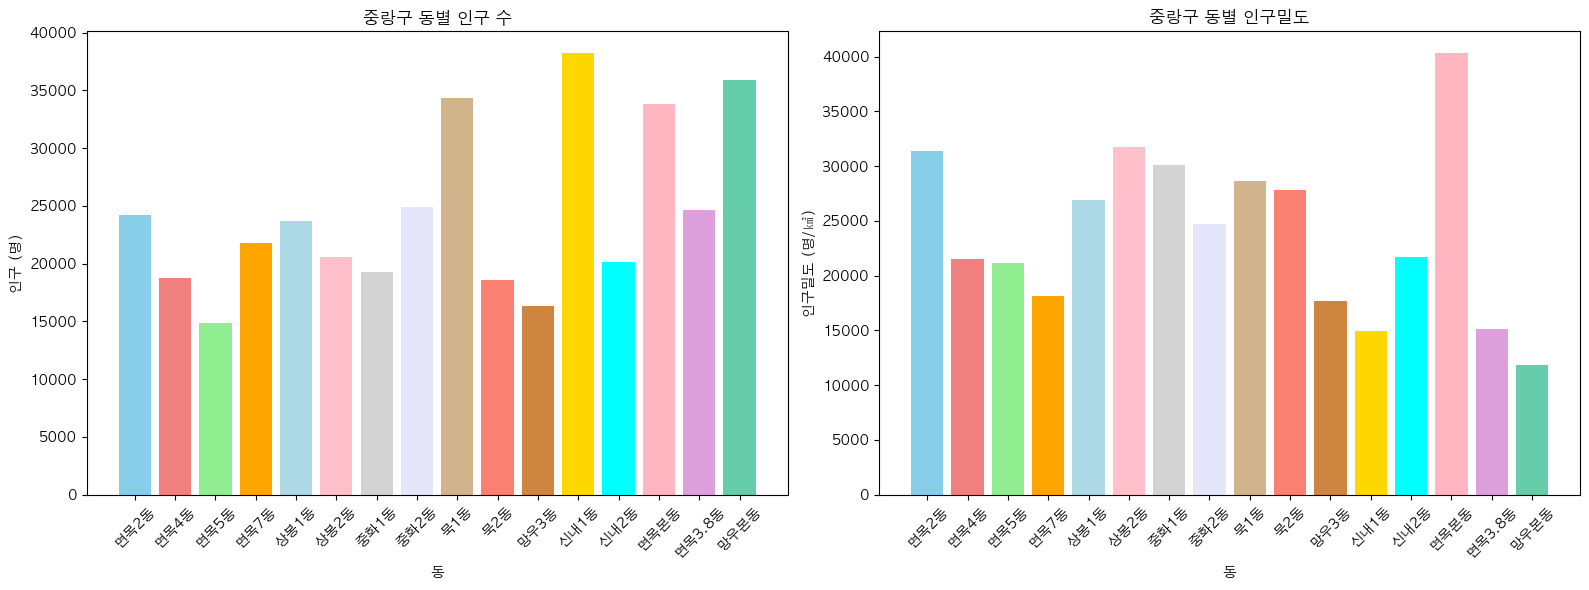

In [9]:
# 사용할 색상 리스트
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightblue', 'pink', 'lightgray', 'lavender', 'tan', 'salmon', 'peru', 'gold', 'cyan', 'lightpink', 'plum', 'mediumaquamarine']

# 동별 인구 및 인구밀도 차트 생성 (한 프레임에 표시)
plt.figure(figsize=(16, 6))  # 전체 figure의 사이즈 조정

# 서브플롯 1 - 동별 인구
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 subplot
plt.bar(df_junrangu_dong['동'], df_junrangu_dong['인구 (명)'], color=colors)
plt.title('중랑구 동별 인구 수')
plt.xlabel('동')
plt.ylabel('인구 (명)')
plt.xticks(rotation=45)

# 서브플롯 2 - 동별 인구밀도
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 subplot
plt.bar(df_junrangu_dong['동'], df_junrangu_dong['인구밀도 (명/㎢)'], color=colors)
plt.title('중랑구 동별 인구밀도')
plt.xlabel('동')
plt.ylabel('인구밀도 (명/㎢)')
plt.xticks(rotation=45)

# 그림 여백 조정
plt.tight_layout()

# 이미지로 저장
plt.savefig('/Users/icda/pythondata/images/중랑구동별인구수인구밀도.png')

# 그래프 표시
plt.show()


In [10]:
df_seoul_price= pd.read_csv('서울시임대료_소규모상가.csv')

df_seoul_price

,지역,2023년 03분기
0,서울전체,49.5
1,서울도심,66.8
2,중랑구,46.4


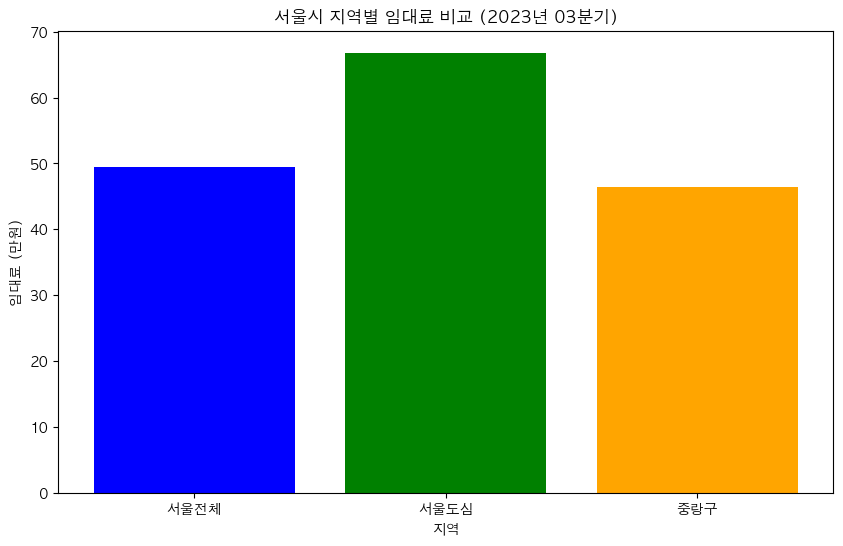

In [11]:
import matplotlib.pyplot as plt

# 데이터 프레임에서 필요한 정보 추출
regions = df_seoul_price['지역']
prices = df_seoul_price['2023년 03분기']

# 막대그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(regions, prices, color=['blue', 'green', 'orange'])
plt.title('서울시 지역별 임대료 비교 (2023년 03분기)')
plt.xlabel('지역')
plt.ylabel('임대료 (만원)')

# 이미지로 저장
plt.savefig('/Users/icda/pythondata/images/서울시_지역별_임대료비교.png')

# 그래프 표시
plt.show()



In [12]:
df_seoul_pt= pd.read_csv('중랑구 스포츠강습 생존율_2023_3분기.csv')

df_seoul_pt

,구,1년 생존율,3년 생존율,5년 생존율
0,중랑구,76.2,50.0,54.5
1,면목2동,0.0,100.0,0.0
2,면목4동,100.0,0.0,0.0
3,면목5동,0.0,0.0,0.0
4,면목본동,100.0,33.3,100.0
5,면목7동,100.0,0.0,0.0
6,면목3·8동,80.0,0.0,0.0
7,상봉1동,0.0,25.0,100.0
8,상봉2동,62.5,60.0,100.0
9,중화1동,100.0,0.0,0.0


In [13]:
df_location = pd.read_csv('중랑구_헬스장좌표.csv')
df_location

,사업장명,위도,경도
0,유코치의 바디스토리PT,37.572599,127.084141
1,아모르 PT,37.578787,127.091690
2,럭키 헬스,37.598387,127.076902
3,이코리아스포츠,37.600083,127.102685
4,세방헬스클럽,37.579087,127.085268
...,...,...,...
75,크로스핏 라온3,37.594951,127.081014
76,머시써짐,37.605480,127.096127
77,크로스핏 레오,37.581125,127.085983
78,2034,37.612971,127.078181


In [14]:
import pandas as pd
df_location = pd.read_csv('중랑구_헬스장좌표.csv').iloc[:,:3]
df_location.columns=['사업장명','위도', '경도']
df_location.head(3)
df_location

,사업장명,위도,경도
0,유코치의 바디스토리PT,37.572599,127.084141
1,아모르 PT,37.578787,127.091690
2,럭키 헬스,37.598387,127.076902
3,이코리아스포츠,37.600083,127.102685
4,세방헬스클럽,37.579087,127.085268
...,...,...,...
75,크로스핏 라온3,37.594951,127.081014
76,머시써짐,37.605480,127.096127
77,크로스핏 레오,37.581125,127.085983
78,2034,37.612971,127.078181


In [15]:
loc = (37.606324, 127.092584)

m9 = folium.Map(location=loc
               , zoom_start=14
              )


from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(m9)


for i in range(len(df_location)):
    center_name = df_location.iloc[i,0]
    lat = df_location.iloc[i,1]
    lon = df_location.iloc[i,2]
    folium.Marker(location = (lat, lon)
                 , tooltip=center_name).add_to(marker_cluster)


# 네모 박스로 제목 추가 (스타일 및 좌측 상단 정렬 변경)
title_html = '''
             <div style="position: fixed;
                         top: 10px; left: 10px; width: 200px; height: 40px;
                         border:2px solid #555; z-index:9999; font-size:16px;
                         background-color:white; text-align:center;
                         color: black; line-height:40px;"><b>중랑구 헬스장 동별 현황</b></div>
             '''
m9.get_root().html.add_child(folium.Element(title_html))


m9

<Axes: >

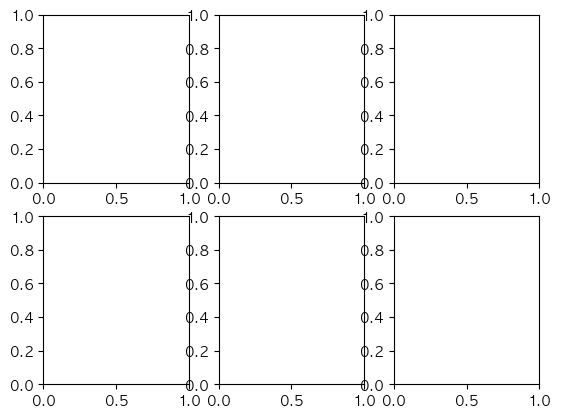

In [16]:
plt.subplot(2, 3, 1)

plt.subplot(2, 3, 2)

plt.subplot(2, 3, 3)

plt.subplot(2, 3, 4)

plt.subplot(2, 3, 5)

plt.subplot(2, 3, 6)

In [17]:
import folium

# 첫 번째 지도 그리기
m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=10.5,
    tiles='CartoDB positron'
)
folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=data,
    columns=['자치구', '체력 단련장 수'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

# 두 번째 지도 그리기
m2 = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=10.5,
    tiles='CartoDB positron'
)
folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=data_seoul_p,
    columns=['구', '상주인구'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m2)

# 이미지를 저장할 경로 지정
save_path = '/Users/icda/pythondata/images/'

# 이미지 저장
m.save(save_path + 'map1.html')
m2.save(save_path + 'map2.html')

print("Images saved successfully.")


Images saved successfully.


In [ ]:
import matplotlib.pyplot as plt

# 서브플롯에 배치할 그래프들
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 첫 번째 그래프: 중랑구 동별 인구 수
axs[0, 0].bar(df_junrangu_dong['동'], df_junrangu_dong['인구 (명)'], color=colors)
axs[0, 0].set_title('중랑구 동별 인구 수')
axs[0, 0].set_xlabel('동')
axs[0, 0].set_ylabel('인구 (명)')
axs[0, 0].tick_params(axis='x', rotation=45)

# 두 번째 그래프: 중랑구 동별 인구밀도
axs[0, 1].bar(df_junrangu_dong['동'], df_junrangu_dong['인구밀도 (명/㎢)'], color=colors)
axs[0, 1].set_title('중랑구 동별 인구밀도')
axs[0, 1].set_xlabel('동')
axs[0, 1].set_ylabel('인구밀도 (명/㎢)')
axs[0, 1].tick_params(axis='x', rotation=45)

# 세 번째 그래프: 중랑구 주간 유동인구 추이
axs[1, 0].plot(df_seoul_jr['기준일ID'], df_seoul_jr['일최대이동인구수'], marker='o', label='일최대이동인구수')
axs[1, 0].set_title('중랑구 주간 유동인구 추이 (2024년)')
axs[1, 0].set_xlabel('날짜')
axs[1, 0].set_ylabel('일최대이동인구수')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].legend()

# 네 번째 그래프: 서울시 지역별 임대료 비교
axs[1, 1].bar(regions, prices, color=['blue', 'green', 'orange'])
axs[1, 1].set_title('서울시 지역별 임대료 비교 (2023년 03분기)')
axs[1, 1].set_xlabel('지역')
axs[1, 1].set_ylabel('임대료 (만원)')
axs[1, 1].tick_params(axis='x', rotation=45)

# 그래프 간 간격 조정
plt.tight_layout()

# 이미지로 저장
plt.savefig('/Users/icda/pythondata/images/combined_plots.png')

# 그래프 표시
plt.show()
